In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
train= pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


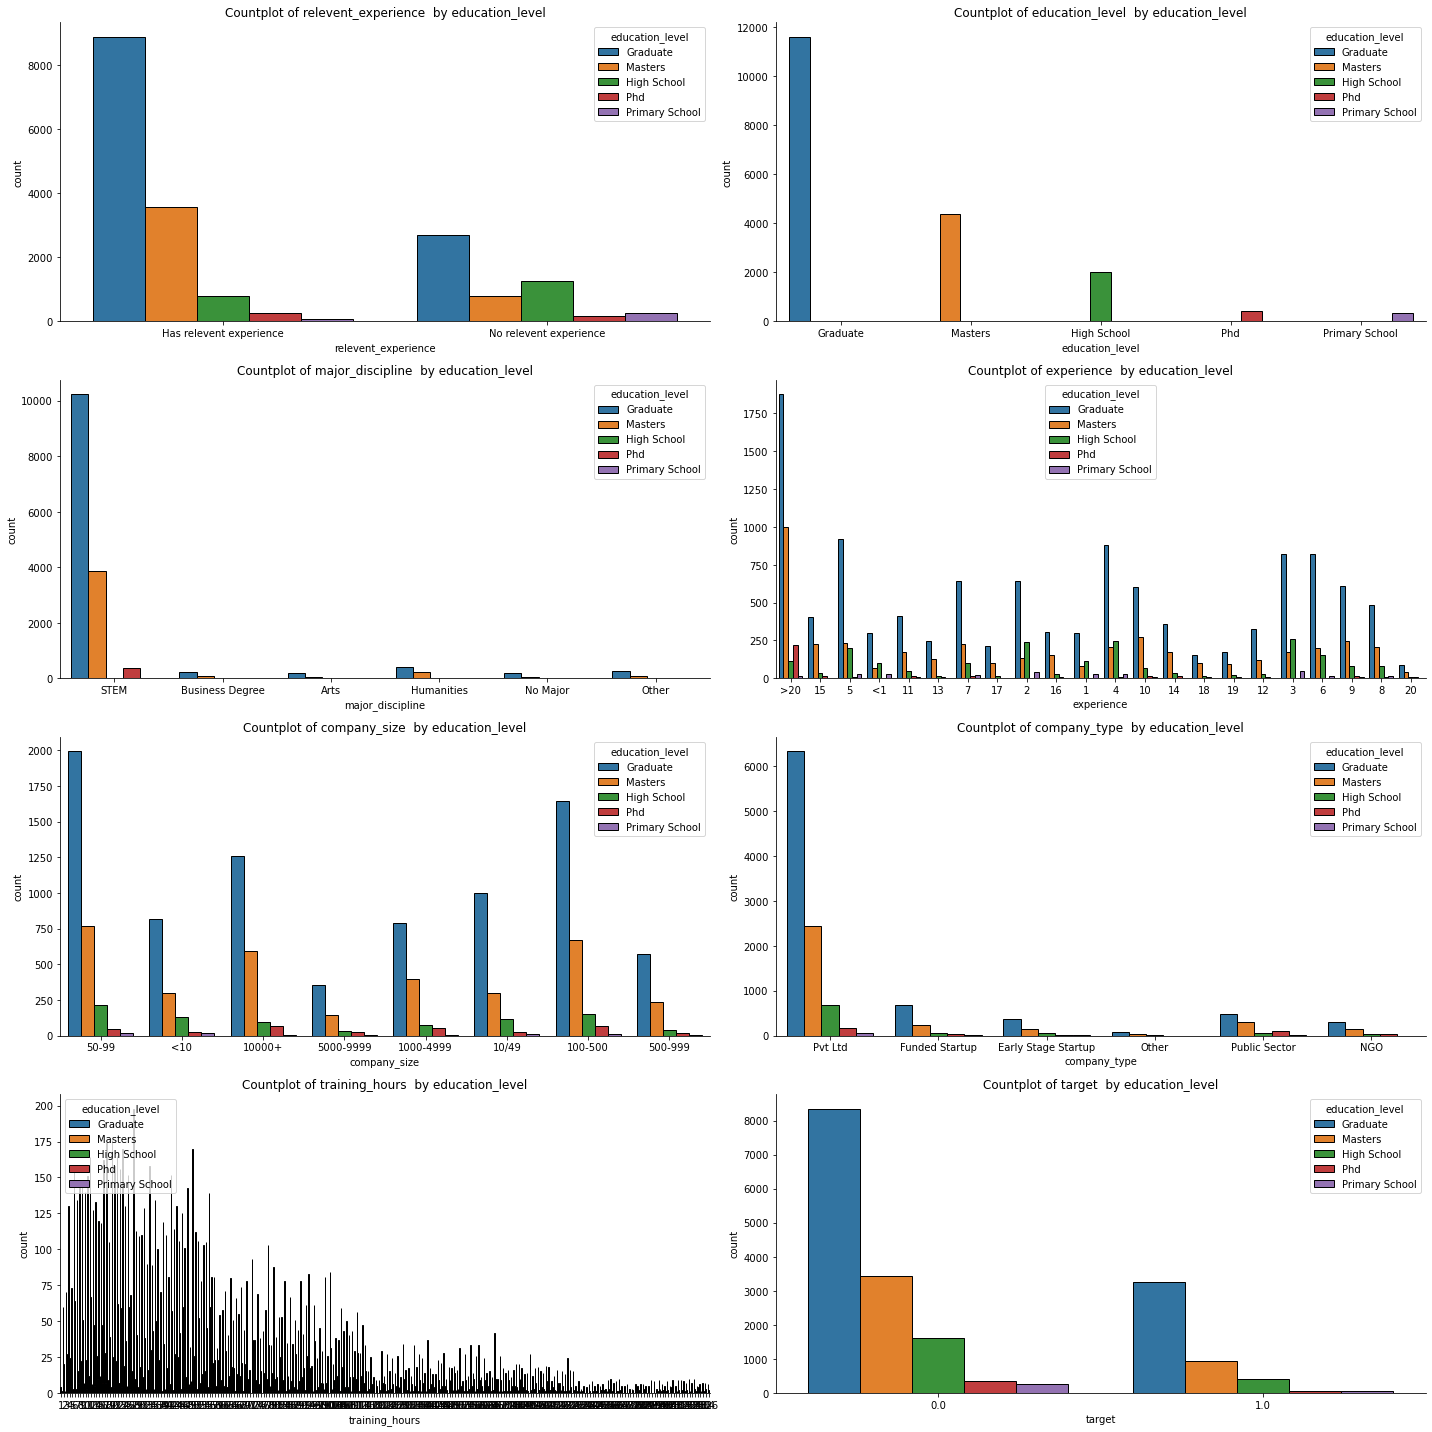

In [3]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[20,20])
fft=["relevent_experience", "education_level","major_discipline", "experience","company_size","company_type", "training_hours","target"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=1, data=train)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


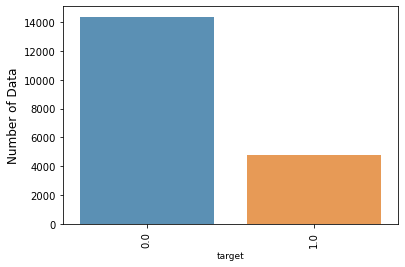

In [4]:
mnj = train['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(mnj.index, mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
plt.show();

In [5]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


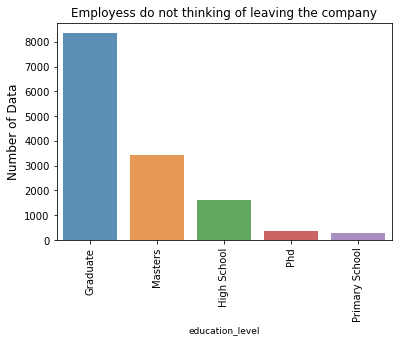

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


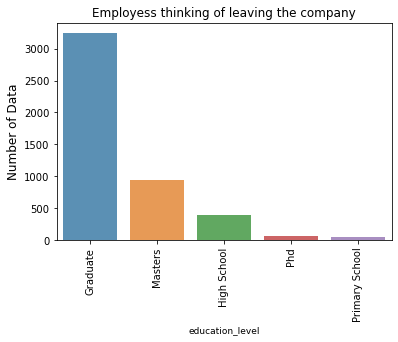

In [6]:
temp = train[train['target']==0]
EL = temp['education_level'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(EL.index, EL.values, alpha=0.8)
plt.title('Employess do not thinking of leaving the company')
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('education_level', fontsize=9)
plt.xticks(rotation=90)
plt.show();

temp = train[train['target']==1]
EL = temp['education_level'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(EL.index, EL.values, alpha=0.8)
plt.title('Employess thinking of leaving the company')
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('education_level', fontsize=9)
plt.xticks(rotation=90)
plt.show();

In [7]:
temp = train[train['target']==0]
el = temp['education_level'].value_counts().reset_index()
el.columns = [
    'education_level', 
    'percent'
]
el['percent'] /= len(train)

fig = px.pie(
    el, 
    names='education_level', 
    values='percent', 
    title='thinking of not leaving the company', 
    width=800,
    height=500 
)

fig.show()

#############################################

temp = train[train['target']==1]
el = temp['education_level'].value_counts().reset_index()
el.columns = [
    'education_level', 
    'percent'
]
el['percent'] /= len(train)

fig = px.pie(
    el, 
    names='education_level', 
    values='percent', 
    title='thinking of leaving the company', 
    width=800,
    height=500 
)

fig.show()

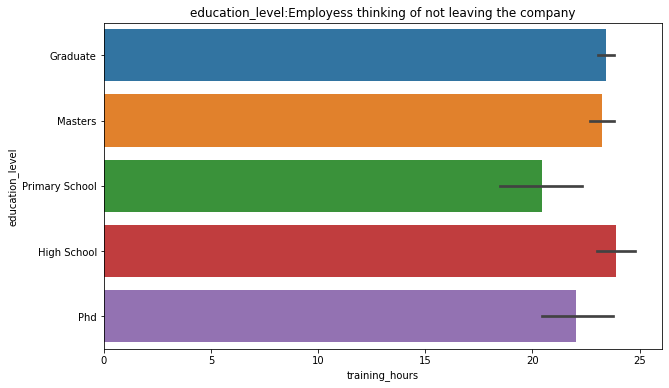

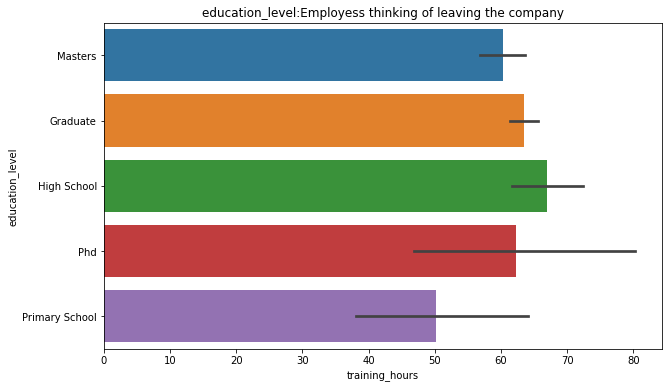

In [8]:
temp = train[train['target']==0]
et = temp.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:Employess thinking of not leaving the company')
plt.show()


temp = train[train['target']==1]
et = temp.sort_values(by='training_hours', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=et.education_level, x=et.training_hours)
plt.xticks()
plt.xlabel('training_hours')
plt.ylabel('education_level')
plt.title('education_level:Employess thinking of leaving the company')
plt.show()

In [9]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

temp = train[train['target']==0]
cd = temp['city_development_index'].value_counts().reset_index()
cd.columns = [
    'city_development_index', 
    'count'
]
cd['city_development_index'] = cd['city_development_index'].astype(str) + '-'
cd = cd.sort_values(['count']).tail(50)

fig = px.bar(
    cd, 
    x='count', 
    y='city_development_index', 
    orientation='h', 
    title='Count: City development index_Employess thinking of not leaving the company', 
    width=1000,
    height=900 
)

fig.show()

#########################################
temp = train[train['target']==1]
cd = temp['city_development_index'].value_counts().reset_index()
cd.columns = [
    'city_development_index', 
    'count'
]
cd['city_development_index'] = cd['city_development_index'].astype(str) + '-'
cd = cd.sort_values(['count']).tail(50)

fig = px.bar(
    cd, 
    x='count', 
    y='city_development_index', 
    orientation='h', 
    title='Count: City development index_Employess thinking of leaving the company', 
    width=1000,
    height=900 
)

fig.show()



In [10]:
temp = train[train['target']==0]
ep = temp['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(train)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience_Employess thinking of not leaving the company', 
    width=800,
    height=500 
)

fig.show()



temp = train[train['target']==1]
ep = temp['experience'].value_counts().reset_index()
ep.columns = [
    'experience', 
    'percent'
]
ep['percent'] /= len(train)

fig = px.pie(
    ep, 
    names='experience', 
    values='percent', 
    title='Experience_Employess thinking of leaving the company', 
    width=800,
    height=500 
)

fig.show()

In [11]:
df_train=copy.deepcopy(train)
cols=['city_development_index','training_hours','enrollee_id','target']
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)

In [12]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,nan,nan,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,nan,No relevent experience,Full time course,Graduate,STEM,5,nan,nan,never,83,0.0
3,33241,city_115,0.789,nan,No relevent experience,nan,Graduate,Business Degree,<1,nan,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [13]:
d = defaultdict(LabelEncoder)
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))

In [14]:
x=list(df_train.corr().columns)
y=list(df_train.corr().index)
values=np.array(df_train.corr().values)
fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,
    hoverongaps = False))
fig.show()